In [49]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline

In [50]:
df = pd.read_csv("income.csv")
df.head(3)

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000


C:\Users\nyasa\Downloads\ANACONDA\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\nyasa\Downloads\ANACONDA\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


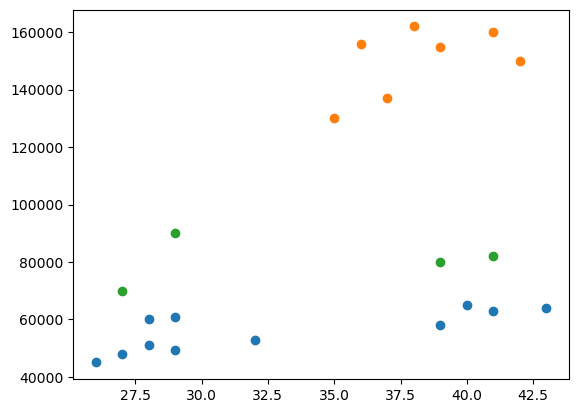

In [51]:
X = df["Age"]
y = df["Income($)"]

km = KMeans(n_clusters = 3)
y_pred = km.fit_predict(df[["Age", "Income($)"]])
df["cluster"] = y_pred

df0 = df[df["cluster"] == 0]
df1 = df[df["cluster"] == 1]
df2 = df[df["cluster"] == 2]

plt.scatter(df0.Age, df0["Income($)"])
plt.scatter(df1.Age, df1["Income($)"])
plt.scatter(df2.Age, df2["Income($)"])


C:\Users\nyasa\Downloads\ANACONDA\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\nyasa\Downloads\ANACONDA\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([[0.1372549 , 0.11633428],
       [0.72268908, 0.8974359 ],
       [0.85294118, 0.2022792 ]])

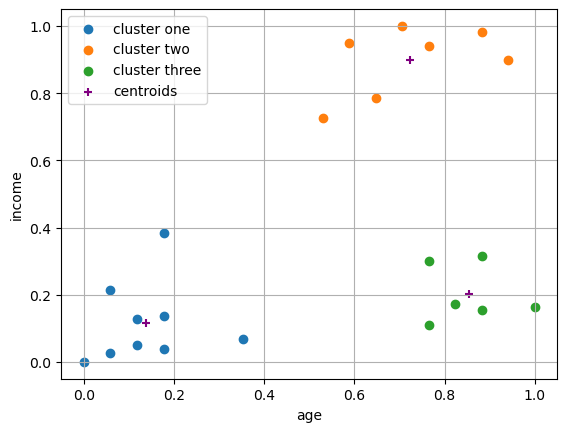

In [69]:
scaler = MinMaxScaler()
df["Income($)"] = scaler.fit_transform(df[["Income($)"]])
df["Age"] = scaler.fit_transform(df[["Age"]])
km = KMeans(n_clusters = 3)
y_pred = km.fit_predict(df[["Age", "Income($)"]])
df["cluster"] = y_pred

df0 = df[df["cluster"] == 0]
df1 = df[df["cluster"] == 1]
df2 = df[df["cluster"] == 2]

plt.scatter(df0.Age, df0["Income($)"], label = "cluster one")
plt.scatter(df1.Age, df1["Income($)"], label = "cluster two")
plt.scatter(df2.Age, df2["Income($)"], label = "cluster three")
plt.scatter(km.cluster_centers_[:, 0],km.cluster_centers_[:, 1], marker = "+", color = "purple", label = "centroids")

plt.legend()
plt.xlabel("age")
plt.ylabel("income")
plt.grid()

km.cluster_centers_

C:\Users\nyasa\Downloads\ANACONDA\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\nyasa\Downloads\ANACONDA\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\nyasa\Downloads\ANACONDA\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\nyasa\Downloads\ANACONDA\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You c

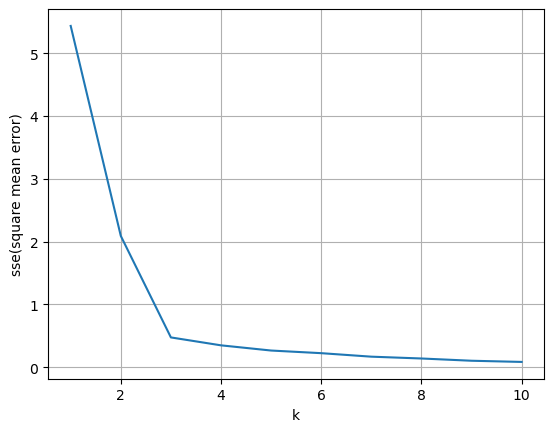

In [74]:
sse = []
k_range = range(1 ,11)
for k in k_range:
    km = KMeans(n_clusters = k)
    km.fit(df[["Age", "Income($)"]])
    sse.append(km.inertia_)
sse
plt.plot(k_range, sse)
plt.xlabel("k")
plt.ylabel("sse(square mean error)")
plt.grid()